In [4]:
pip install ucimlrepo


Perintah pip install ucimlrepo digunakan untuk menginstal library Python bernama ucimlrepo. Library ini menyediakan akses langsung ke berbagai dataset dari UCI Machine Learning Repository, salah satu sumber data terbuka paling populer untuk keperluan penelitian dan pembelajaran di bidang machine learning.

Dengan menginstal ucimlrepo, kita tidak perlu lagi mengunduh dataset secara manual dari situs UCI, karena kita bisa langsung mengambil (fetch) dataset hanya dengan satu baris kode di Python. Ini memudahkan proses eksplorasi data, pemodelan, dan eksperimen karena dataset sudah terformat dalam bentuk DataFrame dari pandas yang siap digunakan.

Perintah ini dijalankan di terminal atau command prompt, dan memanfaatkan pip, yaitu package installer resmi untuk Python yang berfungsi untuk mengunduh dan menginstal library dari Python Package Index (PyPI).

Secara umum, perintah ini merupakan langkah awal penting dalam proyek analisis data atau machine learning yang melibatkan dataset dari UCI.

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

Kode di atas bertujuan untuk mengambil dan mempersiapkan dataset "Cirrhosis Patient Survival Prediction" dari UCI Machine Learning Repository menggunakan library ucimlrepo.

Penjelasan setiap baris kode:

1.  from ucimlrepo import fetch_ucirepo

Baris ini mengimpor fungsi fetch_ucirepo dari library ucimlrepo. Fungsi ini digunakan untuk mengambil dataset dari UCI berdasarkan ID dataset yang tersedia di katalog UCI.
2.   cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

Pada baris ini, kita mengambil dataset dengan ID 878, yaitu dataset prediksi kelangsungan hidup pasien sirosis (Cirrhosis). Dataset ini dimuat dan disimpan dalam variabel cirrhosis_patient_survival_prediction.
3. X = cirrhosis_patient_survival_prediction.data.features

Data fitur (variabel independen) dari dataset diambil dan disimpan dalam variabel X. Biasanya, fitur ini berisi informasi medis pasien seperti usia, jenis kelamin, kadar bilirubin, dan sebagainya.
4. y = cirrhosis_patient_survival_prediction.data.targets

Variabel target (variabel dependen) yang menunjukkan label atau nilai yang ingin diprediksi (misalnya, apakah pasien selamat atau tidak) disimpan dalam variabel y.
5. print(cirrhosis_patient_survival_prediction.metadata)

Baris ini mencetak informasi metadata dari dataset, seperti nama dataset, sumber, lisensi, deskripsi singkat, dan lain-lain yang berkaitan dengan asal dan karakteristik dataset tersebut.

6. print(cirrhosis_patient_survival_prediction.variables)

Terakhir, baris ini mencetak informasi tentang semua variabel dalam dataset, termasuk nama variabel, tipe data, dan penjelasan masing-masing fitur dan target.



In [13]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==============================
# 1. PENGAMBILAN DAN PEMAHAMAN DATA
# ==============================
# Fetch dataset
cirrhosis = fetch_ucirepo(id=878)

# Data
X = cirrhosis.data.features
y = cirrhosis.data.targets

# Tampilkan metadata dan variabel
print("Metadata:\n", cirrhosis.metadata)
print("\nInformasi Variabel:\n", cirrhosis.variables)

# Tinjau data awal
print("\n5 Baris Pertama Data:\n", X.head())
print("\nTarget:\n", y.head())

# Informasi data
print("\nInfo Data:\n")
print(X.info())

# Cek nilai yang hilang
print("\nMissing Values per Kolom:\n", X.isnull().sum())

# Statistik deskriptif
print("\nDeskripsi Statistik:\n", X.describe(include='all'))

Metadata:
 {'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 

Kode ini merupakan bagian dari proses awal dalam pengolahan data untuk prediksi kelangsungan hidup pasien sirosis hati. Dataset yang digunakan diambil dari UCI Machine Learning Repository.

Pertama, beberapa pustaka penting diimpor, seperti ucimlrepo untuk mengambil dataset, pandas untuk manipulasi data, serta beberapa pustaka dari sklearn yang digunakan nanti dalam proses pelatihan dan evaluasi model.

Langkah pertama adalah mengambil dataset sirosis hati dari UCI dengan ID 878. Dataset ini mencakup data medis pasien yang nantinya digunakan untuk prediksi klasifikasi. Setelah dataset berhasil diambil, fitur (variabel independen) dan target (variabel dependen) dipisahkan. Fitur berisi atribut-atribut pasien, sedangkan target berisi status kelangsungan hidup pasien.

Selanjutnya, metadata dan informasi variabel ditampilkan untuk memahami deskripsi dataset secara umum, termasuk arti dari masing-masing kolom, tipe data, dan asal dataset.

Setelah itu, dilakukan peninjauan awal terhadap isi data. Lima baris pertama ditampilkan untuk memberikan gambaran seperti apa data yang akan digunakan, baik dari segi fitur maupun targetnya. Informasi lebih lanjut tentang struktur data, seperti tipe tiap kolom dan jumlah nilai tidak kosong, juga ditampilkan untuk mendeteksi potensi masalah seperti nilai yang hilang.

Kemudian dilakukan pengecekan terhadap nilai yang hilang di setiap kolom. Ini penting untuk menentukan apakah data perlu dibersihkan atau dilakukan imputasi. Terakhir, statistik deskriptif dari data ditampilkan, seperti rata-rata, nilai minimum dan maksimum, serta distribusi nilai dari masing-masing fitur. Ini memberikan pemahaman awal mengenai karakteristik data secara keseluruhan.

Secara keseluruhan, proses ini merupakan tahap eksplorasi data yang krusial dalam workflow machine learning. Tujuannya adalah memastikan kualitas data yang baik sebelum digunakan dalam pelatihan model, serta membantu menentukan strategi preprocessing yang tepat.

 5 Data Teratas:
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status  
0         12.2    4.0     

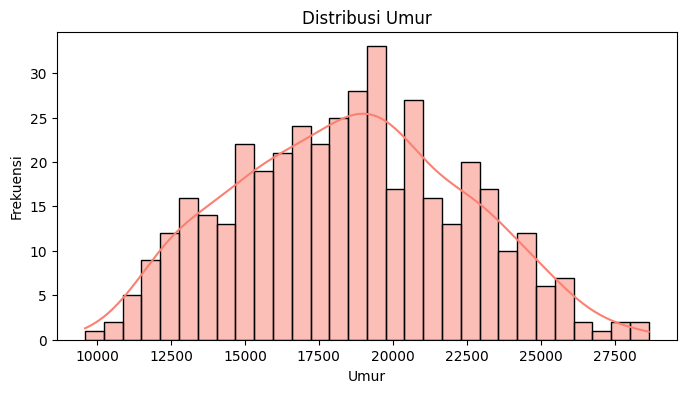

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


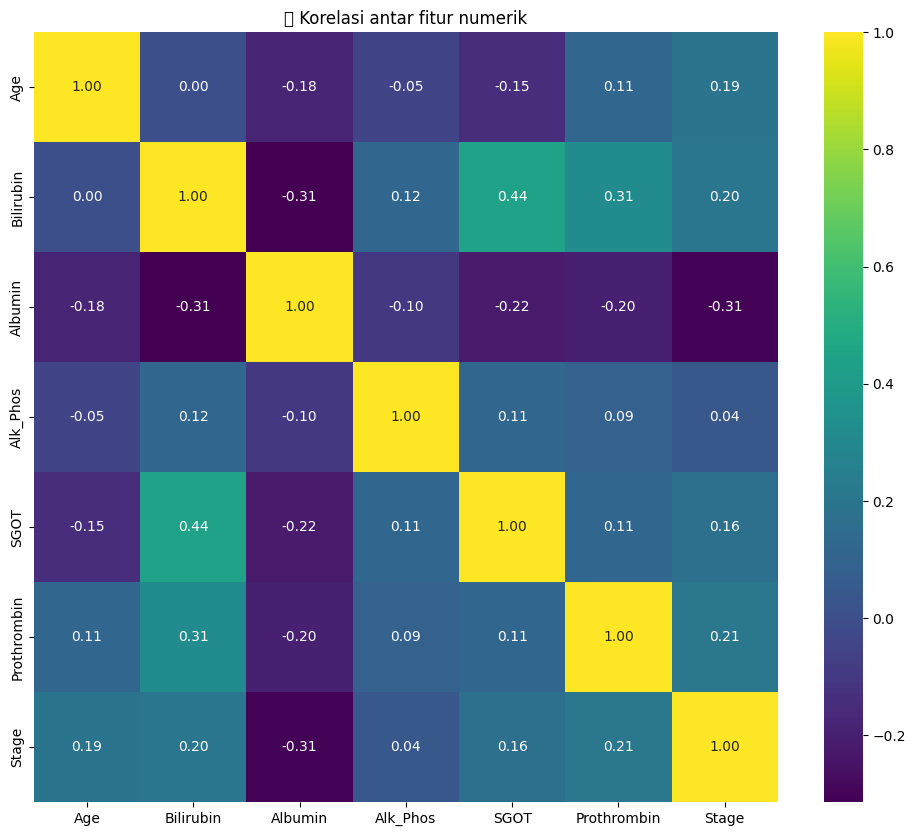

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan fitur dan target agar mudah dianalisis bersama
df = pd.concat([X, y], axis=1)

# 1. Tampilkan data teratas
print(" 5 Data Teratas:")
print(df.head())


# 2. Distribusi kategori (jika ada kolom kategorikal)
kategori_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in kategori_cols:
    print(f"\n Distribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())

# 3. Visualisasi distribusi umur (jika ada)
if 'Age' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
    plt.title('Distribusi Umur')
    plt.xlabel('Umur')
    plt.ylabel('Frekuensi')
    plt.show()

# 4. Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("📊 Korelasi antar fitur numerik")
plt.show()

Kode ini bertujuan untuk melakukan eksplorasi data lebih dalam, khususnya untuk memahami distribusi data, komposisi kategori, serta hubungan antar fitur dalam dataset pasien sirosis hati.

Pertama, data fitur (X) dan target (y) digabungkan menjadi satu DataFrame df agar lebih mudah dianalisis secara bersamaan. Dengan penggabungan ini, kita bisa melihat bagaimana fitur-fitur tertentu berkaitan langsung dengan target (misalnya status kelangsungan hidup pasien).

Langkah pertama eksplorasi dimulai dengan menampilkan lima baris pertama dari data. Ini memberikan gambaran cepat tentang isi dataset, termasuk tipe dan skala data.

Kemudian dilakukan identifikasi terhadap kolom-kolom kategorikal, yaitu kolom yang bertipe data object atau category. Untuk setiap kolom kategorikal, ditampilkan distribusi nilai (frekuensi kemunculan setiap kategori). Langkah ini sangat penting untuk memahami proporsi kategori, serta untuk mengidentifikasi jika ada kategori yang dominan atau data yang tidak seimbang.

Selanjutnya, jika kolom ‘Age’ terdapat dalam dataset, maka dibuatlah visualisasi distribusi umur menggunakan histogram. Visualisasi ini membantu kita melihat sebaran usia pasien dalam dataset—apakah didominasi oleh usia tertentu, apakah datanya simetris atau tidak, dan apakah ada outlier.

Akhirnya, dilakukan analisis korelasi antar fitur numerik dengan menggunakan heatmap. Korelasi mengukur hubungan linear antar variabel numerik. Visualisasi ini sangat berguna untuk mengidentifikasi fitur-fitur yang mungkin memiliki hubungan kuat satu sama lain, atau dengan target. Nilai korelasi berkisar dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan 0 menunjukkan tidak ada korelasi.

Secara keseluruhan, kode ini membantu mengungkap pola dan karakteristik penting dalam data sebelum memasuki tahap pemodelan machine learning.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ==============================
# 2. PREPROCESSING DATA
# ==============================

# Pisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"Kolom numerik  : {len(num_cols)} kolom")
print(f"Kolom kategori : {len(cat_cols)} kolom")

# Imputasi nilai hilang pada kolom numerik
num_imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Imputasi nilai hilang pada kolom kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)

# Gabungkan kembali data numerik dan kategorikal yang sudah dibersihkan
X_clean = pd.concat([X_num, X_cat], axis=1)

# One-hot encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X_clean)
print(f"Total fitur setelah encoding: {X_encoded.shape[1]}")

# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Konfirmasi akhir
print("Preprocessing selesai. Data siap digunakan untuk pemodelan.")


Kolom numerik  : 7 kolom
Kolom kategori : 10 kolom
Total fitur setelah encoding: 776
Preprocessing selesai. Data siap digunakan untuk pemodelan.


1. Pemisahan Kolom Berdasarkan Tipe Data
Pertama-tama, data fitur X dipisahkan menjadi dua jenis:

Kolom Numerik: Kolom yang berisi angka (tipe int atau float), seperti usia, kadar bilirubin, dan sebagainya.

Kolom Kategorikal: Kolom yang berisi data teks atau kategori, seperti jenis kelamin, status alkohol, dll.

Hal ini penting karena perlakuan terhadap data numerik dan kategorikal berbeda dalam preprocessing.

2. Imputasi Nilai Hilang
Nilai hilang (missing values) dapat menyebabkan model gagal berfungsi atau memberikan hasil yang tidak akurat. Oleh karena itu, dilakukan proses imputasi:

Untuk kolom numerik: Nilai kosong diisi dengan rata-rata dari kolom tersebut menggunakan SimpleImputer(strategy='mean').

Untuk kolom kategorikal: Nilai kosong diisi dengan nilai yang paling sering muncul (modus) menggunakan SimpleImputer(strategy='most_frequent').

Setelah proses ini, tidak ada lagi data kosong dalam dataset.

3. Penggabungan Kembali Data
Data numerik dan kategorikal yang telah dibersihkan kemudian digabungkan kembali menjadi satu DataFrame X_clean, agar dapat diproses secara menyeluruh pada tahap berikutnya.

4. One-Hot Encoding
Untuk kolom kategorikal, dilakukan transformasi ke dalam bentuk numerik melalui teknik one-hot encoding menggunakan pd.get_dummies(). Teknik ini membuat setiap nilai unik dalam kolom kategorikal menjadi kolom baru yang bernilai 0 atau 1.

Setelah encoding, jumlah fitur menjadi lebih banyak karena setiap kategori baru diubah menjadi kolom terpisah.

5. Standardisasi Fitur
Terakhir, seluruh fitur (baik hasil dari kolom numerik maupun hasil one-hot encoding) distandarisasi menggunakan StandardScaler. Ini penting untuk membuat semua fitur berada dalam skala yang sama (mean = 0, standar deviasi = 1), sehingga model machine learning—terutama model berbasis jarak seperti SVM atau KNN—dapat bekerja dengan optimal.

6. Konfirmasi Akhir
Setelah seluruh tahapan selesai, ditampilkan pesan konfirmasi bahwa preprocessing telah selesai, dan data kini siap digunakan untuk proses pemodelan.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Random Forest berhasil dilatih.
Jumlah pohon (n_estimators): 100
Fitur yang digunakan: 776


<ipython-input-18-ce763a7ceb82>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')


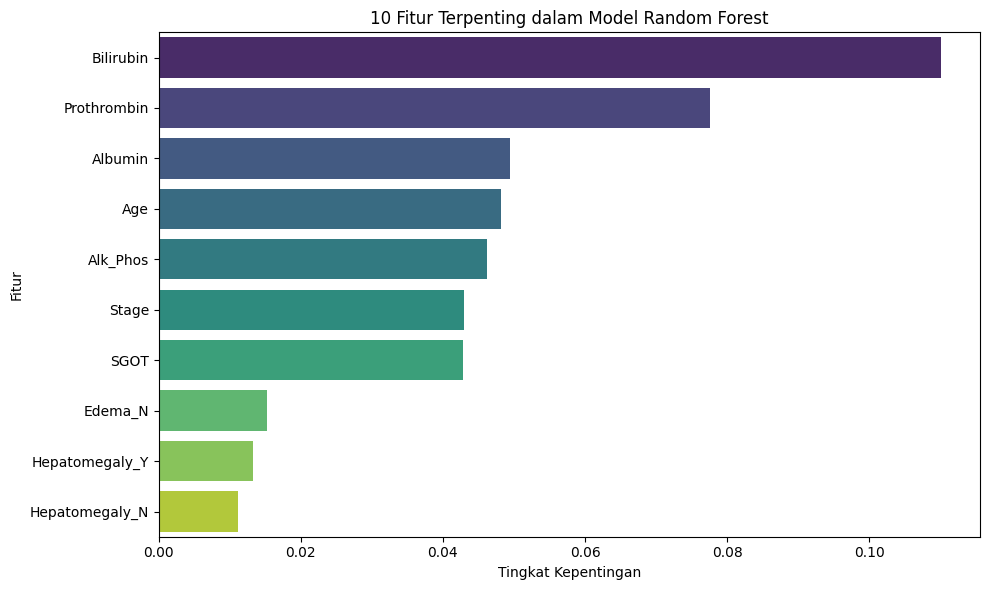

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tampilkan informasi model
print("Model Random Forest berhasil dilatih.")
print(f"Jumlah pohon (n_estimators): {model.n_estimators}")
print(f"Fitur yang digunakan: {X_encoded.shape[1]}")

# Menampilkan pentingnya fitur
importances = model.feature_importances_
feature_names = X_encoded.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi 10 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("10 Fitur Terpenting dalam Model Random Forest")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


1. Pembagian Data
Dataset yang telah discale sebelumnya (X_scaled dan y) dibagi menjadi dua bagian:

Data Latih (Training Set): 80% dari data, digunakan untuk melatih model.

Data Uji (Testing Set): 20% dari data, digunakan untuk mengevaluasi kinerja model. Proses pembagian dilakukan menggunakan fungsi train_test_split() dengan random_state=42 untuk memastikan hasil yang konsisten.

2. Pelatihan Model Random Forest
Model RandomForestClassifier diinisialisasi dan dilatih menggunakan data latih (X_train, y_train).
Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk menghasilkan prediksi yang lebih akurat dan stabil.

Setelah pelatihan:

Ditampilkan informasi bahwa model berhasil dilatih.

Ditampilkan jumlah pohon dalam hutan (n_estimators, default-nya adalah 100).

Ditampilkan jumlah fitur yang digunakan setelah encoding.

3. Menghitung Pentingnya Fitur
Setelah model dilatih, digunakan atribut .feature_importances_ untuk mendapatkan nilai pentingnya masing-masing fitur terhadap prediksi model. Nilai ini menunjukkan seberapa besar kontribusi setiap fitur dalam membuat keputusan.

Data pentingnya fitur disimpan dalam DataFrame (feat_imp_df) yang berisi:

Nama fitur (Feature)

Nilai pentingnya (Importance) Kemudian diurutkan dari yang paling penting ke yang kurang penting.

4. Visualisasi 10 Fitur Terpenting
Digunakan seaborn.barplot untuk membuat grafik batang yang menampilkan 10 fitur terpenting berdasarkan nilai penting yang dihitung. Grafik ini memudahkan dalam menginterpretasikan fitur-fitur mana yang paling berpengaruh dalam model Random Forest.



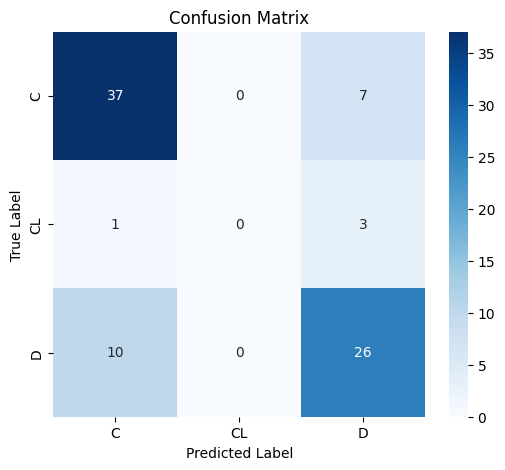

Classification Report:



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
C,0.77,0.84,0.80,44.00
CL,0.00,0.00,0.00,4.00
D,0.72,0.72,0.72,36.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.50,0.52,0.51,84.00
weighted avg,0.71,0.75,0.73,84.00


Akurasi Model: 75.00%


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report sebagai DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:\n")
display(report_df.round(2))

# Akurasi
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi*100:.2f}%")


1. Prediksi Hasil
Model yang telah dilatih (model) digunakan untuk melakukan prediksi terhadap data uji (X_test).
Hasil prediksi disimpan dalam variabel y_pred.

2. Visualisasi Confusion Matrix
Confusion Matrix digunakan untuk menilai seberapa baik model melakukan klasifikasi dengan benar terhadap setiap kelas.

Langkah-langkah:

Menggunakan confusion_matrix() untuk membandingkan label asli (y_test) dengan prediksi (y_pred).

Menampilkan hasil matrix dalam bentuk heatmap menggunakan seaborn.heatmap().

Heatmap ini membantu secara visual melihat jumlah prediksi yang benar (diagonal utama) dan salah klasifikasi (di luar diagonal).

3. Classification Report
classification_report() digunakan untuk memberikan evaluasi lebih detail terhadap performa model untuk setiap kelas. Metrik yang disajikan mencakup:

Precision: Akurasi model dalam memprediksi suatu kelas.

Recall: Kemampuan model dalam menemukan semua data positif untuk suatu kelas.

F1-score: Rata-rata harmonis dari precision dan recall.

Support: Jumlah data aktual untuk tiap kelas.

Report dikonversi ke bentuk DataFrame (report_df) agar lebih rapi dan mudah dibaca, lalu ditampilkan dengan pembulatan dua angka di belakang koma.

4. Akurasi
Akurasi adalah persentase prediksi yang benar dibandingkan dengan total prediksi.
Nilainya dihitung menggunakan accuracy_score() dan dikalikan 100 untuk ditampilkan dalam bentuk persentase.

Evaluasi

Kode tersebut digunakan untuk melakukan evaluasi model klasifikasi dengan cara yang menyeluruh dan profesional. Pertama, model digunakan untuk menghasilkan prediksi terhadap data uji, lalu hasilnya dibandingkan dengan label yang sebenarnya melalui confusion matrix, yang divisualisasikan dalam bentuk heatmap untuk memudahkan pemahaman tentang kesalahan dan keberhasilan klasifikasi antar kelas. Selanjutnya, metrik evaluasi seperti precision, recall, dan f1-score disajikan dalam bentuk tabel menggunakan pandas.DataFrame, memberikan informasi mendalam tentang performa model untuk masing-masing kelas. Terakhir, akurasi model dihitung dengan menggunakan accuracy_score dan ditampilkan dalam bentuk persentase, menggambarkan proporsi prediksi yang benar secara keseluruhan. Pendekatan ini sangat efektif untuk analisis laporan, dokumentasi hasil, atau presentasi karena menyajikan evaluasi secara jelas baik dalam bentuk visual maupun numerik.